## Análise e diagnóstico

Nesse notebook são feitas algumas análises para o diagnóstico dos dados da API do Olho Vivo

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
#consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

gdf_final = load_csv('gdf_final.csv')

Ônibus que operam em mais de uma linha

In [3]:
gdf_final

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2
0,68853,5010-10,False,0.148350,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),True,0.000317
1,68853,5010-10,False,0.032385,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000061
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000000
3,68853,5010-10,False,0.087365,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),True,0.000187
4,68853,5010-10,False,0.051327,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),True,0.000110
...,...,...,...,...,...,...,...,...,...,...,...
139714,73205,6014-10,False,0.000000,"[317105.7824061066, 7373509.694308272]","[np.float64(317105.7824061066), np.float64(737...",2025-10-02 12:55:50-03:00,2025-10-02 12:55:50-03:00,Midiônibus,True,0.000000
139715,48005,407G-10,False,0.252541,"[352769.53811401135, 7389163.07991912]","[np.float64(353021.55868181016), np.float64(73...",2025-10-02 12:55:35-03:00,2025-10-02 12:56:20-03:00,Articulado (23m),True,0.000573
139716,61310,6960-10,False,0.000000,"[325377.1291750581, 7382996.118304582]","[np.float64(325377.1291750581), np.float64(738...",2025-10-02 12:55:37-03:00,2025-10-02 12:56:21-03:00,Miniônibus,True,0.000000
139717,61322,5370-10,False,0.000000,"[325117.0786599126, 7370478.8199460115]","[np.float64(325117.0786599126), np.float64(737...",2025-10-02 12:55:29-03:00,2025-10-02 12:56:14-03:00,Miniônibus,False,0.000000


In [4]:
gdf_final['id_2'] = gdf_final['linha'] + '_' + gdf_final['id_onibus'].astype(str)

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2
0,68853,5010-10,False,0.148350,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),True,0.000317,5010-10_68853
1,68853,5010-10,False,0.032385,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000061,5010-10_68853
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000000,5010-10_68853
3,68853,5010-10,False,0.087365,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),True,0.000187,5010-10_68853
4,68853,5010-10,False,0.051327,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),True,0.000110,5010-10_68853


In [5]:
gdf_final['id_onibus'].nunique()

10090

In [6]:
gdf_final['id_2'].nunique()

10095

In [7]:
df = gdf_final.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = gdf_final[gdf_final['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
45786,3117,414P-10
45785,3117,4027-41
122618,52706,5103-10
122612,52706,5107-10
9667,90999,5032-10
9658,90999,514T-10
9655,90999,3778-10
9654,90999,2722-10


In [8]:
counts = gdf_final.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([3117, 52706, 90999], dtype='int64', name='id_onibus')

Ônibus duplicados

In [9]:
#duplicados = (df_posicoes.groupby(["id_onibus", "timestamp"]).filter(lambda x: len(x) > 1).sort_values(["id_onibus", "timestamp"]))

#duplicados

Horas e datas das posições

In [10]:
df_posicoes['timestamp'] = pd.to_datetime(df_posicoes['timestamp'])

In [11]:
horas = df_posicoes["timestamp"].dt.hour

horas_unicas = horas.unique()
horas_unicas.sort()

print(horas_unicas)

[ 9 10 11 12]


In [12]:
dez_horas = df_posicoes[df_posicoes["timestamp"].dt.hour == 10]

dez_horas

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
51132,2705-10,36022,2025-10-02 10:08:52-03:00,-23.547345,-46.392863,False,Padron
61131,2705-10,36022,2025-10-02 10:16:58-03:00,-23.545614,-46.393119,False,Padron
78718,2705-10,36022,2025-10-02 10:25:59-03:00,-23.545614,-46.393119,False,Padron
88768,2705-10,36022,2025-10-02 10:31:46-03:00,-23.544820,-46.402256,False,Padron


In [13]:
datas = df_posicoes["timestamp"].dt.date

datas_unicas = datas.unique()
datas_unicas.sort()

print(datas_unicas)

[datetime.date(2025, 10, 2)]


Distâncias e velocidades impossíveis

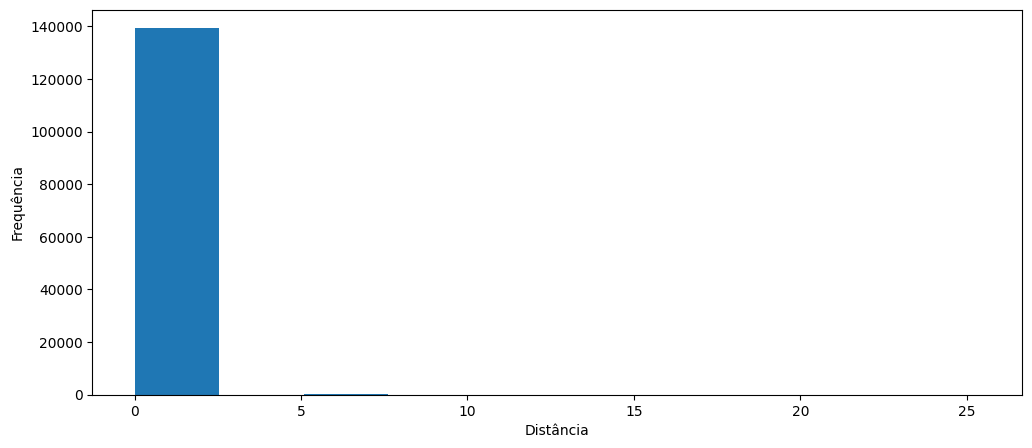

In [14]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_km"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

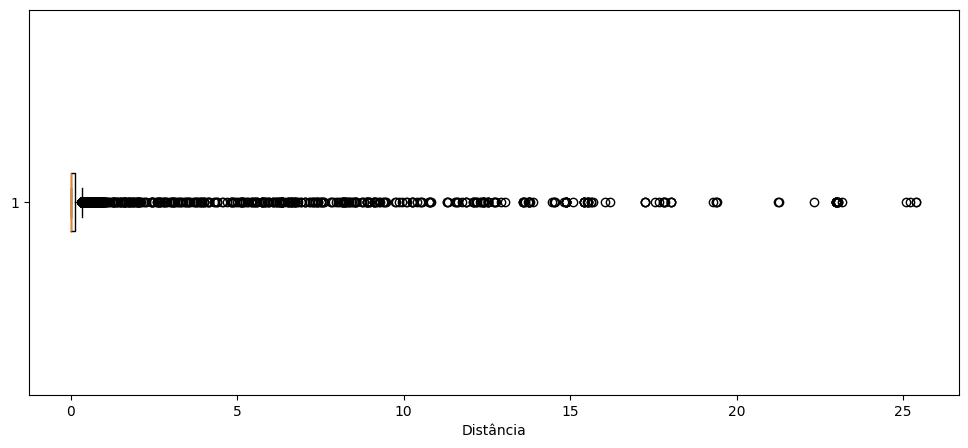

In [15]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_km"], vert=False)
plt.xlabel("Distância")
plt.show()

In [16]:
gdf_final[gdf_final['distancia_km'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2


In [17]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final'] = pd.to_datetime(gdf_final['momento_final'])

In [18]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2,duracao
0,68853,5010-10,False,0.148350,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),True,0.000317,5010-10_68853,47.0
1,68853,5010-10,False,0.032385,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000061,5010-10_68853,42.0
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000000,5010-10_68853,0.0
3,68853,5010-10,False,0.087365,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),True,0.000187,5010-10_68853,70.0
4,68853,5010-10,False,0.051327,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),True,0.000110,5010-10_68853,19.0


In [19]:
gdf_final["velocidade"] = (gdf_final["distancia_km"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2,duracao,velocidade
0,68853,5010-10,False,0.148350,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),True,0.000317,5010-10_68853,47.0,0.011363
1,68853,5010-10,False,0.032385,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000061,5010-10_68853,42.0,0.002776
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000000,5010-10_68853,0.0,NaN
3,68853,5010-10,False,0.087365,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),True,0.000187,5010-10_68853,70.0,0.004493
4,68853,5010-10,False,0.051327,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),True,0.000110,5010-10_68853,19.0,0.009725


In [20]:
gdf_final['velocidade'].describe()

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    9.978300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      6.921175e-03
75%      1.621212e-02
max               inf
Name: velocidade, dtype: float64

In [21]:
gdf_final["velocidade"] = gdf_final["velocidade"].replace([np.inf, -np.inf], np.nan)

gdf_final = gdf_final.dropna(subset=["velocidade"])

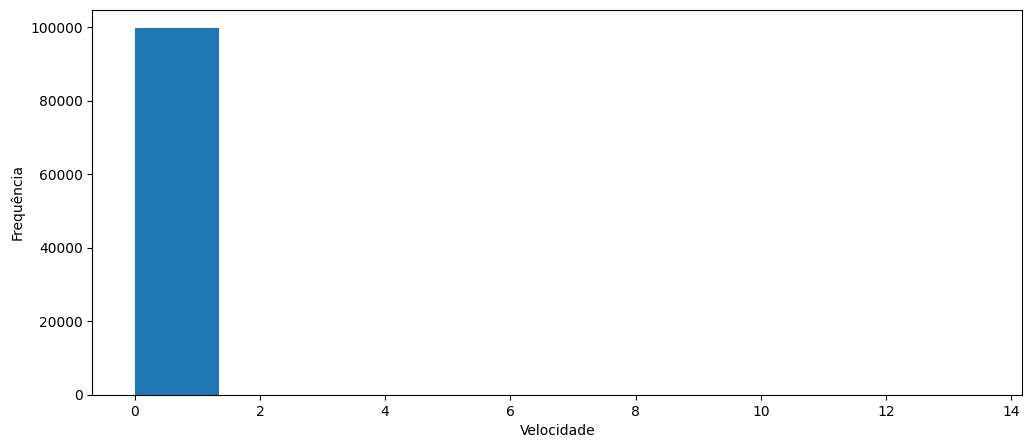

In [22]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["velocidade"])
plt.xlabel("Velocidade")
plt.ylabel("Frequência")
plt.show()

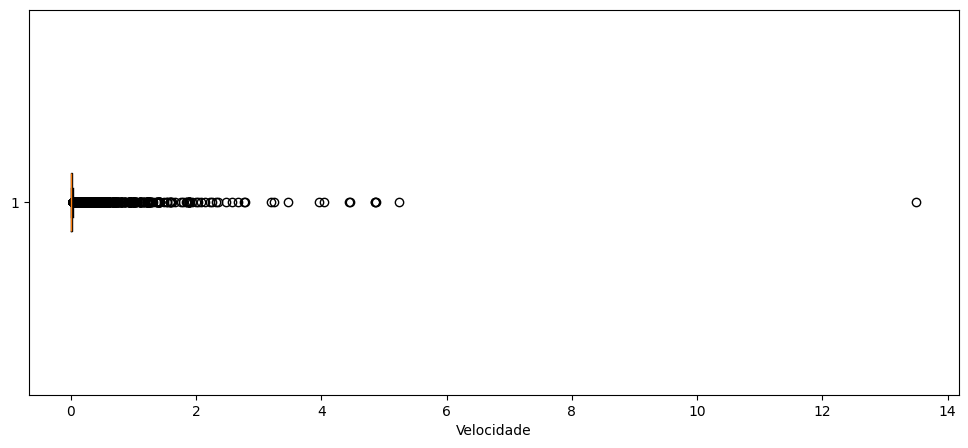

In [23]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["velocidade"], vert=False)
plt.xlabel("Velocidade")
plt.show()

In [24]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2,duracao,velocidade
0,68853,5010-10,False,0.148350,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),True,0.000317,5010-10_68853,47.0,0.011363
1,68853,5010-10,False,0.032385,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),False,0.000061,5010-10_68853,42.0,0.002776
3,68853,5010-10,False,0.087365,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),True,0.000187,5010-10_68853,70.0,0.004493
4,68853,5010-10,False,0.051327,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),True,0.000110,5010-10_68853,19.0,0.009725
6,68853,5010-10,False,0.138057,"[332692.8276940262, 7383863.500523301]","[np.float64(332576.2268227334), np.float64(738...",2025-10-02 12:51:41-03:00,2025-10-02 12:52:28-03:00,Articulado (18m),False,0.000262,5010-10_68853,47.0,0.010575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139712,31643,274P-10,False,0.167990,"[334571.0892961961, 7393150.561850594]","[np.float64(334492.10205995), np.float64(73932...",2025-10-02 12:55:15-03:00,2025-10-02 12:55:59-03:00,Biarticulado,False,0.000359,274P-10_31643,44.0,0.013745
139715,48005,407G-10,False,0.252541,"[352769.53811401135, 7389163.07991912]","[np.float64(353021.55868181016), np.float64(73...",2025-10-02 12:55:35-03:00,2025-10-02 12:56:20-03:00,Articulado (23m),True,0.000573,407G-10_48005,45.0,0.020203
139716,61310,6960-10,False,0.000000,"[325377.1291750581, 7382996.118304582]","[np.float64(325377.1291750581), np.float64(738...",2025-10-02 12:55:37-03:00,2025-10-02 12:56:21-03:00,Miniônibus,True,0.000000,6960-10_61310,44.0,0.000000
139717,61322,5370-10,False,0.000000,"[325117.0786599126, 7370478.8199460115]","[np.float64(325117.0786599126), np.float64(737...",2025-10-02 12:55:29-03:00,2025-10-02 12:56:14-03:00,Miniônibus,False,0.000000,5370-10_61322,45.0,0.000000


In [25]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2,duracao,velocidade


In [26]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_km,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,tem_ar,emissao_co2,id_2,duracao,velocidade
